# Milestone 2

> Ryan Lu Soon Han (82078023)

---

## **1. Introduction**

### 1.1 Import All Necessary Libraries
In milestone 2, I will use the libraries we discussed in class for data analysis such as **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** and others to make this data analysis goes as smooth as possible.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pdp
import matplotlib.pyplot as plt

---
### 1.2 Load in Medical cost dataset

In [2]:
medical_Cost = pd.read_csv('../Medical_Cost.csv') # load Medical_Cost.csv as a dataframe to Medical_Cost

---
### 1.3 Getting to know the dataset better with *basic Pandas functions*

By using Pandas to explore our dataset, we pave our way to perform a better Exploratory Data Analysis.

In [8]:
medical_Cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
medical_Cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From medical_Cost.info(), particularly the Dtype column, we can see the data type of each attribute. This can be useful for future data analysis because it may prevent us from encountering errors.

In [10]:
medical_Cost.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

From the medical_Cost.info function we can see that the dataset has 1338 entries and 7 attributes as well as other information from the table.

> **medical_Cost.shape** will also display the number of elements and columns included in a dataset

Similarly, medical_Cost.size will return the size (nrow * ncol) of the dataframe 

#### Identifying **Isnull** & **Isna** values

Handling missing or empty values is critical in the data analysis process. These values may place noticeable deviation on the accuracy of our EDA.

In [11]:
medical_Cost.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [12]:
medical_Cost.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Based on the report of the two functions, the medical cost dataset does not contains any missing or empty values. This is a positive sign of a robust dataset which can make the data analysis simpler.

Due to this, we will not have to perform **medical_Cost.dropna()** on any columns.

We can double check this by using: 

In [13]:
medical_Cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This confirms that there is no null values in the dataset that we have to worry about.

#### Statistical Summary with **describe()**

Summary of **categorical** data:

In [14]:
medical_Cost.describe(exclude = [np.number]).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


Summary of **numerical** data:

In [15]:
medical_Cost.describe(include = [np.number], exclude = ['category']).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


---
## **2. EDA with Pandas-Profiling**

we can generate a quick exploratory data analysis with visualizations and distributions of each attributes using Pandas-Profiling. Below is the ouput of using Pandas-Profiling on Medical_Cost csv.

In [5]:
medical_Cost_pdp = pdp.ProfileReport(medical_Cost)
medical_Cost_pdp

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
## **3. Data Wrangling**

Data wrangling plays an important part in data analysis. It is the process of improving the quality of a raw dataset to make it more suitable for further analysis.

In this project, data wrangling paves the way for method chaining in the later part of the milestone.

### 3.1 Ideas to improve the dataset

1. Capitalize each column name **OR** TOUPPERCASE each column name
2. Round charges into two decimal places
3. Change 'yes' and 'no' into capitalized
4. Change Region into abbreviations
5. Sort the Dataset by Charges

### 3.2 Create a new dataset for modifications

In [40]:
improved_medical_Cost = medical_Cost

### 3.3 Rename attributes

Capitalize each column name. For example, 'age' -> 'Age'.

In [46]:
improved_medical_Cost = improved_medical_Cost.rename(columns = {'age': 'Age', 'sex': 'Gender', 'bmi': 'BMI', 'children': 'Children', 'smoker': 'Smoker', 'region': 'Region', 'charges': 'Charges'})

> Since we do not have any NULL or NAN values in the dataset, we will not have to worry about .dropna() as well as resetting the index to get new index without missing values.

### 3.4 Round Charges and BMI to two decimal places

In [60]:
improved_medical_Cost = improved_medical_Cost.round({'Charges': 2, 'BMI': 2})

### 3.5 Capitalize 'yes' 'no' under Smoker attribute

In [59]:
improved_medical_Cost = improved_medical_Cost.replace({'yes': 'Yes', 'no': 'No'})

### 3.6 Change Region into abbreviations

In [62]:
improved_medical_Cost = improved_medical_Cost.replace({'southwest': 'SW', 'southeast': 'SE', 'northeast': 'NE', 'northwest': 'NW'})

### 3.7 Sort the dataset by Charges

In [63]:
improved_medical_Cost = improved_medical_Cost.sort_values('Charges', ascending = True)


---
## Display Improved Dataset

In [64]:
improved_medical_Cost

,Age,Gender,BMI,Children,Smoker,Region,Charges
940,18,male,23.21,0,No,SE,1121.87
808,18,male,30.14,0,No,SE,1131.51
1244,18,male,33.33,0,No,SE,1135.94
663,18,male,33.66,0,No,SE,1136.40
22,18,male,34.10,0,No,SE,1137.01
...,...,...,...,...,...,...,...
819,33,female,35.53,0,Yes,NW,55135.40
577,31,female,38.10,1,Yes,NE,58571.07
1230,52,male,34.48,3,Yes,NW,60021.40
1300,45,male,30.36,0,Yes,SE,62592.87


---
## **4. Method Chaining**

In section 3, where data wrangling was performed, I used multiple steps and cells to arrive at what I reckon is a better dataset. However, I could have used the method chaining technique to perform the same operation which results in the same output, this method saves time, space and improves code readability.

### 4.1 Build the Method Chain

In [3]:
improved_medical_Cost_MC = (
    pd.read_csv('../Medical_Cost.csv')
    .rename(columns = {'age': 'Age', 'sex': 'Gender', 'bmi': 'BMI', 'children': 'Children', 'smoker': 'Smoker', 'region': 'Region', 'charges': 'Charges'})
    .round({'Charges': 2, 'BMI': 2})
    .replace({'yes': 'Yes', 'no': 'No'})
    .replace({'southwest': 'SW', 'southeast': 'SE', 'northeast': 'NE', 'northwest': 'NW'})
    .sort_values('Charges', ascending = True)
)

#### Compare ***improved_medical_Cost*** with ***improved_medical_Cost_MC***

In [70]:
improved_medical_Cost

,Age,Gender,BMI,Children,Smoker,Region,Charges
940,18,male,23.21,0,No,SE,1121.87
808,18,male,30.14,0,No,SE,1131.51
1244,18,male,33.33,0,No,SE,1135.94
663,18,male,33.66,0,No,SE,1136.40
22,18,male,34.10,0,No,SE,1137.01
...,...,...,...,...,...,...,...
819,33,female,35.53,0,Yes,NW,55135.40
577,31,female,38.10,1,Yes,NE,58571.07
1230,52,male,34.48,3,Yes,NW,60021.40
1300,45,male,30.36,0,Yes,SE,62592.87


In [69]:
improved_medical_Cost_MC

,Age,Gender,BMI,Children,Smoker,Region,Charges
940,18,male,23.21,0,No,SE,1121.87
808,18,male,30.14,0,No,SE,1131.51
1244,18,male,33.33,0,No,SE,1135.94
663,18,male,33.66,0,No,SE,1136.40
22,18,male,34.10,0,No,SE,1137.01
...,...,...,...,...,...,...,...
819,33,female,35.53,0,Yes,NW,55135.40
577,31,female,38.10,1,Yes,NE,58571.07
1230,52,male,34.48,3,Yes,NW,60021.40
1300,45,male,30.36,0,Yes,SE,62592.87


This demonstrates that method chaining is **more efficient** while able to ouput the same desired results.

### 4.2 Wrap the Method Chain into a Function

In [3]:
def load_and_process(csv):
    # Method Chain 1 (Load Data and Rename Columns)
    df1 = (
        pd.read_csv(csv)
        .rename(columns = {'age': 'Age', 'sex': 'Gender', 'bmi': 'BMI', 'children': 'Children', 'smoker': 'Smoker', 'region': 'Region', 'charges': 'Charges'})
    )
    
    # Method Chain 2 (Change yesNo and Region)
    df2 = (
        df1
        .replace({'yes': 'Yes', 'no': 'No'})
        .replace({'southwest': 'SW', 'southeast': 'SE', 'northeast': 'NE', 'northwest': 'NW'})
    )
    
    # Method Chain 3 (Round Charges & BMI and sort by Charges)
    df3 = (
        df2
        .round({'Charges': 2, 'BMI': 2})
        .sort_values('Charges', ascending = True)
    )
    
    # return values
    return df3

#### 4.2.1 Test the function

In [4]:
load_and_process("../Medical_Cost.csv")

,Age,Gender,BMI,Children,Smoker,Region,Charges
940,18,male,23.21,0,No,SE,1121.87
808,18,male,30.14,0,No,SE,1131.51
1244,18,male,33.33,0,No,SE,1135.94
663,18,male,33.66,0,No,SE,1136.40
22,18,male,34.10,0,No,SE,1137.01
...,...,...,...,...,...,...,...
819,33,female,35.53,0,Yes,NW,55135.40
577,31,female,38.10,1,Yes,NE,58571.07
1230,52,male,34.48,3,Yes,NW,60021.40
1300,45,male,30.36,0,Yes,SE,62592.87


Perfect! The function returns the same output as improved_medical_Cost and improved_medical_Cost_MC

---
## **5. Self-Conducted Exploratory Data Analysis**

Exploratory Data Analysis helps us to gain better understanding of our dataset. As stated in [here](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e), performing an EDA means that we can *(but not limited to)*:
+ Extract important variables and trim unwanted attributes
+ Identify potential outliers, errors or any missing values
+ Understand the correlation between each attributes
+ Quality assurance to check whether the data requires further cleaning
+ formulate assumptions for our analysis

So let's get started.

### 5.1 Know the dataset

This is usually the first step in an analysis, to get to know my dataset better. We can acheive this by using functions in the Pandas library to get the basic information on the dataset. These functions include *(but not limited to)*, .shape(), .head(), .describe().

Since I have already done this in **Section 1. Introduction**, I will not repeat the same process here again.


#### Questions to ask myself

1. Is there any redundant variables that I want to remove?

2. Is there any NA or NULL values that I have to address?
3. Should I remove potential outliers in the dataset?

At the moment, all attributes available in the dataset seems useful and ready for further analysis, so removing redundant variables can be skipped.
Also, we have known from previous sections that this dataset does not contains any NA or NULL values. This is a good sign because it means that we do not need to remove any rows.

### 5.2 Data Visualization

This is arguably the most critical part of my Exploratory Data Analysis, is to visualize the relationships of each attributes with the help of charts and the **Seaborn** library

#### 5.2.1 Set up the environment for the EDA

since we have already imported Seaborn in the beginning, we can dive straight into setting the themes and styles.

In [110]:
sns.set_theme(style = "white", font_scale = 1.3)

#### 5.2.2 Basic Distribution visualization

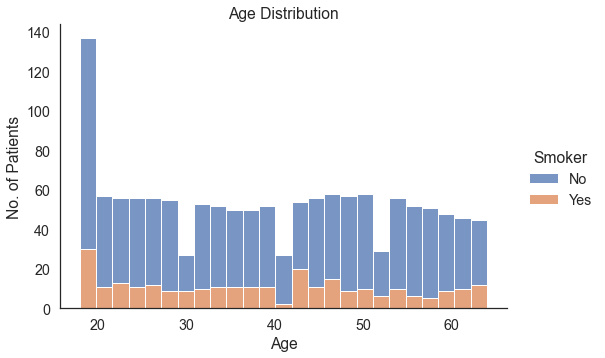

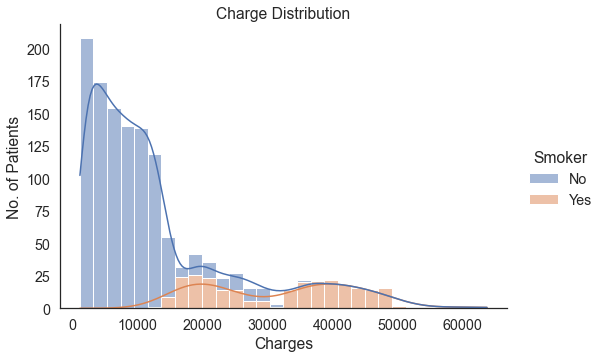

In [208]:
# Age distribution
sns.displot(data = improved_medical_Cost, x = 'Age', hue = 'Smoker', bins = 25, multiple = "stack", aspect = 1.5).set(ylabel = "No. of Patients", title = "Age Distribution")

# Charge Distribution
sns.displot(improved_medical_Cost, x = 'Charges', hue = 'Smoker', kde = True, multiple = "stack", aspect = 1.5).set(ylabel = "No. of Patients", title = "Charge Distribution")

#### 5.2.3 Intermediate Distribution Visualization

##### i. Distribution of Charge and Age

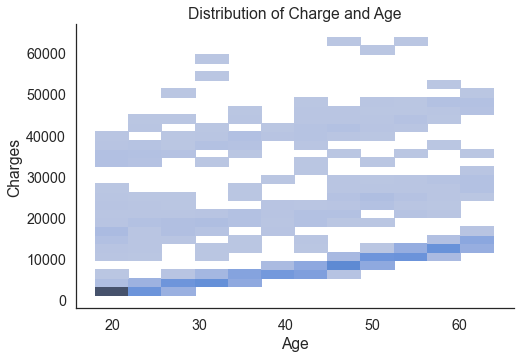

In [210]:
sns.displot(data = improved_medical_Cost, x = 'Age', y = 'Charges', aspect = 1.5).set(title = "Distribution of Charge and Age")

##### ii. Distribution of Charge and Smoker

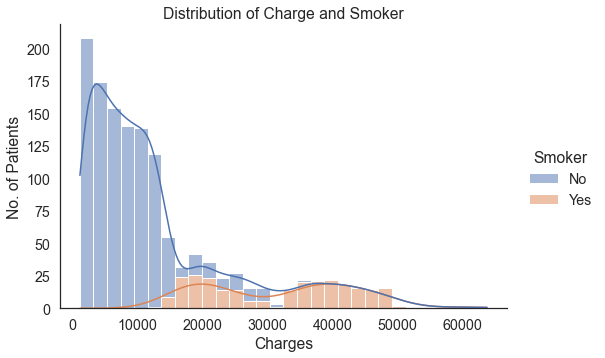

In [297]:
sns.displot(data = improved_medical_Cost, x = 'Charges', hue = 'Smoker', multiple = 'stack', kde = True, aspect = 1.5).set(title = "Distribution of Charge and Smoker", ylabel = "No. of Patients")

#### 5.2.4 Boxplot Visualizations

Boxplot is a type of chart often used in EDAs because it is useful in that it graphically depicts groups of numerical data through quartiles and other statistics.

##### i. Boxplot Visualization for Charges

<AxesSubplot:ylabel='Charges'>

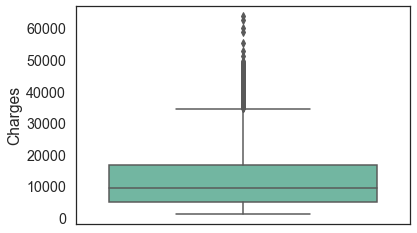

In [218]:
sns.boxplot(data = improved_medical_Cost, y = "Charges", palette = "Set2")

##### ii. Boxplot Visualization for BMI

<AxesSubplot:xlabel='BMI'>

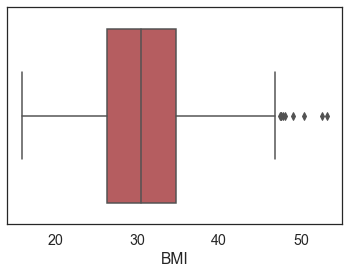

In [226]:
sns.boxplot(data = improved_medical_Cost, x = "BMI", color = "r")

##### iii. Boxplot Visualization for Smoker and Charges

<AxesSubplot:xlabel='Smoker', ylabel='Charges'>

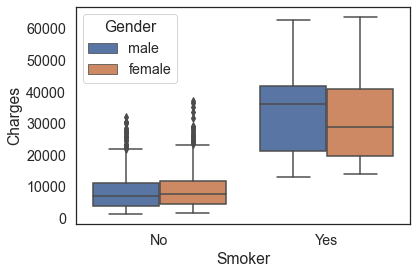

In [215]:
sns.boxplot(data = improved_medical_Cost, x = "Smoker", y = "Charges", hue = "Gender")

#### 5.2.5 Strip Plot

##### i. Strip Plot Visualization on Smoker and Charges

<AxesSubplot:xlabel='Smoker', ylabel='Charges'>

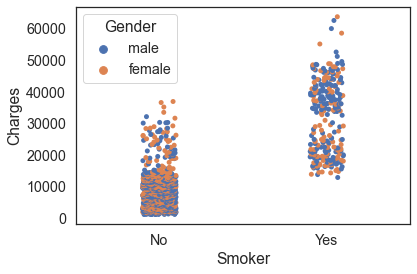

In [232]:
sns.stripplot(data = improved_medical_Cost, x = 'Smoker', y = 'Charges', jitter = True, hue = 'Gender')

##### ii. Strip Plot Visualization on Children and Charges

<AxesSubplot:xlabel='Children', ylabel='Charges'>

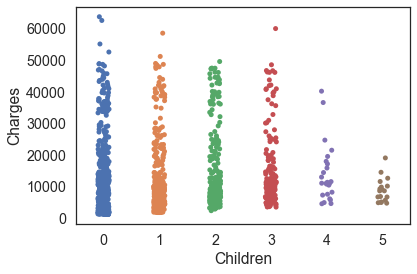

In [233]:
sns.stripplot(data = improved_medical_Cost, x = 'Children', y = 'Charges', jitter = True)

#### 5.2.6 Pair Plot Visualization

Pair plot is useful in EDA in that it summarizes the dataframe's numerical data

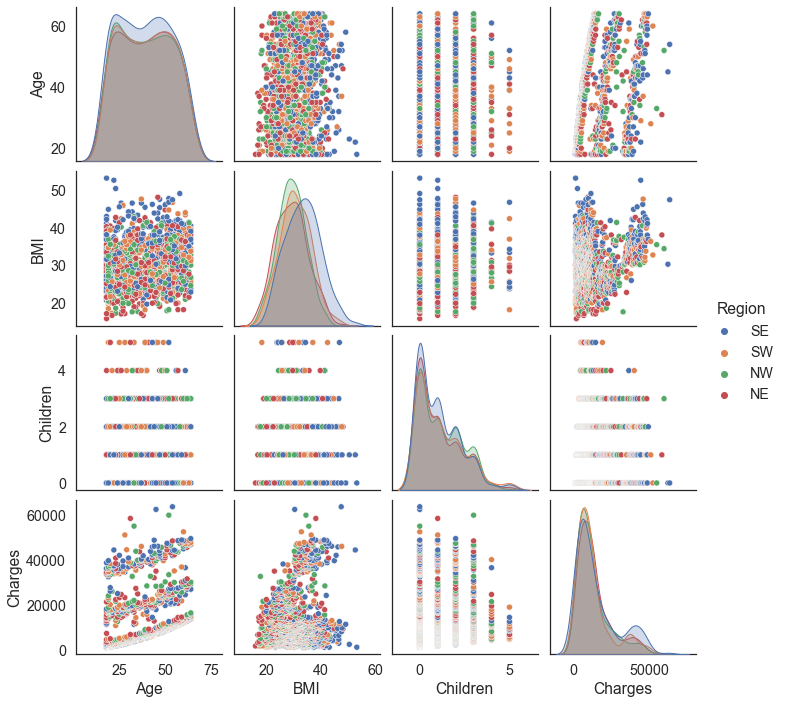

In [241]:
sns.pairplot(improved_medical_Cost, hue = 'Region')

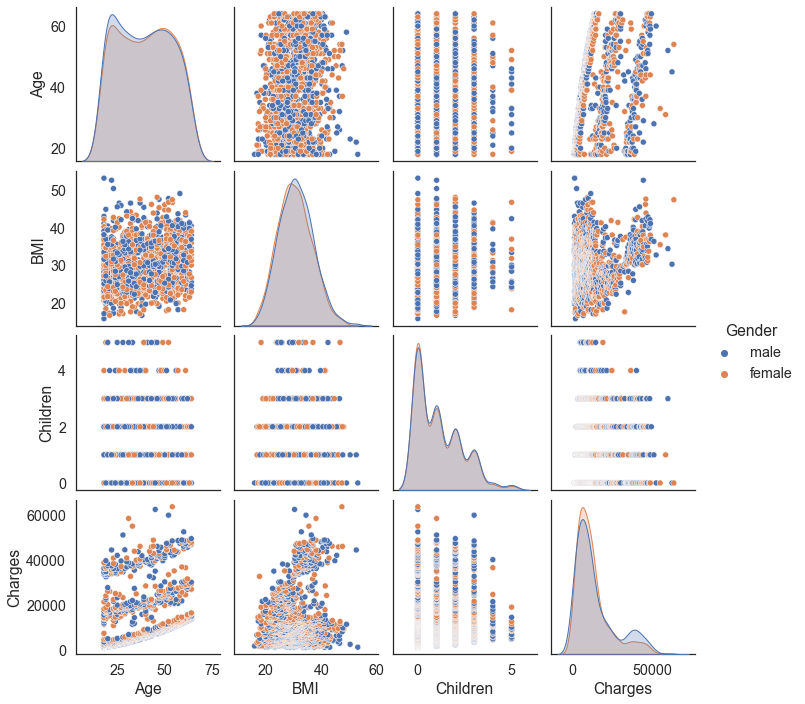

In [242]:
sns.pairplot(improved_medical_Cost, hue = 'Gender')

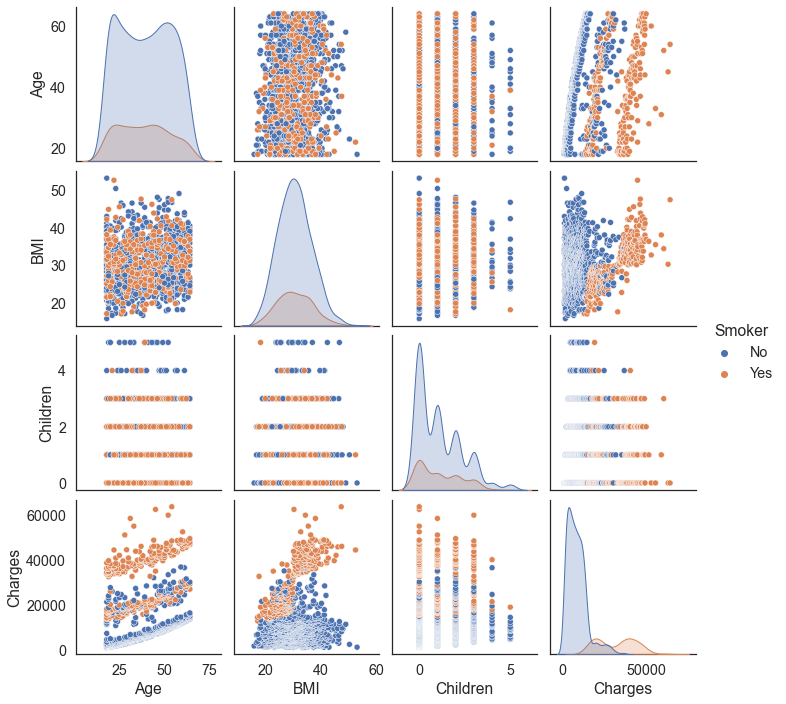

In [243]:
sns.pairplot(improved_medical_Cost, hue = 'Smoker')

#### 5.2.7 Scatter Plot Visualizations

##### i. Correlation of No. Children and Charges

<AxesSubplot:xlabel='Children', ylabel='Charges'>

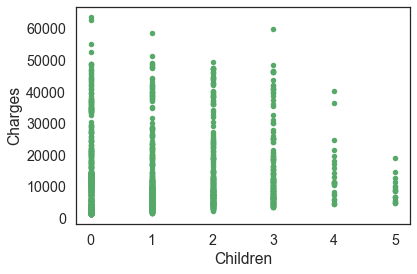

In [261]:
improved_medical_Cost.plot(kind = 'scatter', x = 'Children', y = 'Charges', color = 'g')

##### ii. Correlation of Age and Charges

<AxesSubplot:xlabel='Age', ylabel='Charges'>

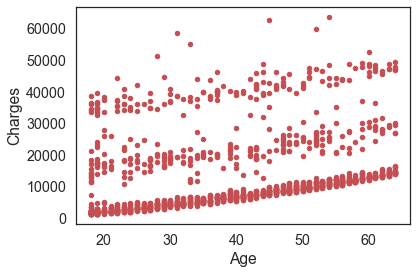

In [260]:
improved_medical_Cost.plot(kind = 'scatter', x = 'Age', y = 'Charges', color = "r")

#### 5.2.8 Regression Visualizations

##### i. Relationship between Age, BMI

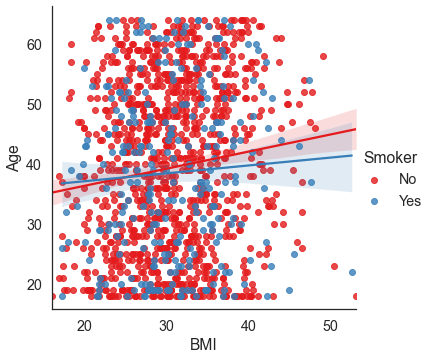

In [275]:
sns.lmplot(data = improved_medical_Cost, x = "BMI", y = "Age", hue = "Smoker", palette="Set1")

##### ii. Relationship Between Age and Charges

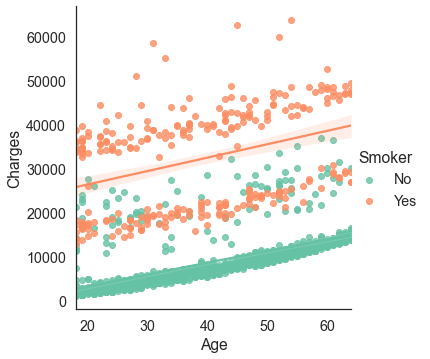

In [279]:
sns.lmplot(data = improved_medical_Cost, x = "Age", y = "Charges", hue = "Smoker", palette="Set2")

##### iii. Relationship Between BMI, Charges

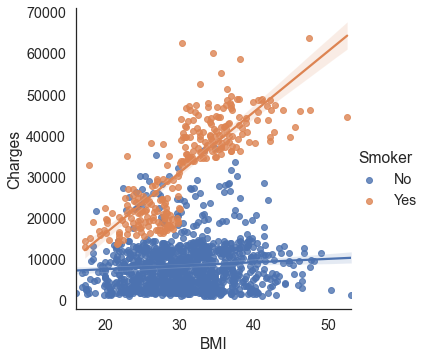

In [270]:
sns.lmplot(data = improved_medical_Cost, x = "BMI", y = "Charges", hue = "Smoker")

### 5.3 Analysis using EDA

After a series of data visualization, I am able to spot some obvious correlations betweeen each attributes.

From Section 5.2.2, we can see that the age distribution is almost evenly spread out across 20 to 60+ years old, except the under 20 age group. The patient count for age under 20 is more than twice of the other age groups.

By using the code below, we can see that the number of patients under age 20 is 137, while the average count for the rest of the age group is 48.83.

In [288]:
print((improved_medical_Cost['Age']<20).sum())
print(((improved_medical_Cost['Age']>20).sum())/24)

137
48.833333333333336


From the Charge distribution, we see a right-skewed distribution 

From the Charge distribution, we see a right-skewed distribution with most of the charges cost under 10,000. Surprisingly, there is an insignificant portion of smokers with cost under 10,000; even more shocking, many of the patients with medical fee costing over 10,000 have the habit of smoking. The ratio of smokers with non-smokers only increases with the increase of medical charges.

In [295]:
print("The averaged charge is {}".format(improved_medical_Cost['Charges'].mean()))
print("The median is {}".format(improved_medical_Cost['Charges'].median()))

The averaged charge is 13270.422279521672
The median is 9382.029999999999


From the distribution of charge and age (Section 5.2.3 (i)), we can see a slight positive correlation between age and charges; that is, as age increases, medical cost increases. By seeing the darker areas in the distribution plot, we can also tell that most of the entries have medical cost of under 10,000.

Boxplots graphically depicts the groups of numerical data by showing information such as the median, quartiles and outliers. From Section 5.2.4 (i), we see that 50% of the dataset has charges around 5,000 to ~20,000 as well as the median of ~10,000. The graph also calculates the outliers; in this case, the upper whiskers mark around 35,000 and any charges above 35,000 are outliers. From section 5.2.4 (ii), the boxplot for BMI, the median of the patients BMI is close to 30 with 50% of the dataset having BMI of 25 – 35. With upper whisker at 47, the boxplot has noted some outliers with BMI close to and over 50.

The boxplot explaining the correlation of smokers and charges showcases the significant difference between the charges for smokers and non-smokers. Patients with no smoking habits have a much lower overall charge, while the charges for smokers are notably higher for both male and female. The strip plot used for visualizing the relationship between smokers and charges displays similar output with the boxplot mentioned above. This plot further confirms that the overall charges for smokers are higher than non-smokers.

Another visualization I create out of curiosity suggests that as the number of children a patient, have negatively correlates to his/her medical charges. In other words, the medical costs are lower if the patient have more children. This may be due to lack of entries with families with 4 – 5 children because the correlation of the two elements with families of 0 – 3 children are consistent and evenly spread out.